In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.datasets import load_iris
import tensorflow as tf
from tensorflow import keras

# Load the Iris dataset
iris_data = load_iris()

# Features (Sepal Length, Sepal Width, Petal Length, Petal Width)
X = iris_data['data']

# Labels (Species: Setosa, Versicolor, Virginica)
y = iris_data['target']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a simple neural network model
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(4,), activation='relu'),  # Hidden layer with 10 neurons
    keras.layers.Dense(3, activation='softmax')  # Output layer with 3 neurons (3 species)
])

# Compile the model
model.compile(optimizer='adam', # adjust the weight by optimizer
              loss='sparse_categorical_crossentropy', # variation 
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50) #training going to 50 times

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)




Epoch 1/50


4/4 [==============================] - 1s 4ms/step - loss: 1.4600 - accuracy: 0.3333
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 1.3243 - accuracy: 0.3333
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 1.2056 - accuracy: 0.3333
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1145 - accuracy: 0.3417
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 1.0320 - accuracy: 0.3917
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9688 - accuracy: 0.5667
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9179 - accuracy: 0.6583
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 0.8712 - accuracy: 0.6750
Epoch 9/50
4/4 [==============================] - 0s 3ms/step - loss: 0.8310 - accuracy: 0.6750
Epoch 10/50
4/4 [==============================] - 0s 2ms/step - loss: 0.7977 - accuracy: 0.6750
Epoch 11/50
4/4 [=================

In [3]:
import requests
from bs4 import BeautifulSoup
import csv

# Base URL of the page to scrape
base_url = 'https://www.dtims.intan.my/search_course?page='

# Number of pages to scrape
num_pages = 10  # Adjust this number based on the total pages you want to scrape

# List to store course data
course_data = []

# Loop through each page
for page in range(1, num_pages + 1):
    # Construct the full URL for the current page
    url = base_url + str(page)
    
    # Send a request to the website
    response = requests.get(url)
    
    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find all the course links
    course_links = soup.find_all('a', href=True)
    
    # Extract course codes and URLs from each page
    for link in course_links:
        if 'detail_course' in link['href']:
            course_url = link['href']
            # Extracting course code from the URL (last part of the URL)
            course_code = course_url.split('/')[-1]
            course_data.append({'course_code': course_code, 'course_url': course_url})

# Saving the data into a CSV file
csv_filename = 'all_course_links.csv'
with open(csv_filename, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=['course_code', 'course_url'])
    writer.writeheader()
    for course in course_data:
        writer.writerow(course)

print(f"Data saved to {csv_filename}")


Data saved to all_course_links.csv


In [4]:
# Example new input (sepal length, sepal width, petal length, petal width)
new_input = [[5.9, 3.0, 5.1, 1.8]]  # Replace this with your own measurements

# Use the trained model to predict the species of the new input
prediction = model.predict(new_input)

# Get the predicted class (species) with the highest probability
predicted_class = tf.argmax(prediction[0]).numpy()

# Mapping predicted class back to species name
species_mapping = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
predicted_species = species_mapping[predicted_class]

# Print the predicted species
print(f'The predicted species for the input {new_input} is: {predicted_species}')

1/1 [==============================] - 0s 112ms/step
The predicted species for the input [[5.9, 3.0, 5.1, 1.8]] is: Virginica


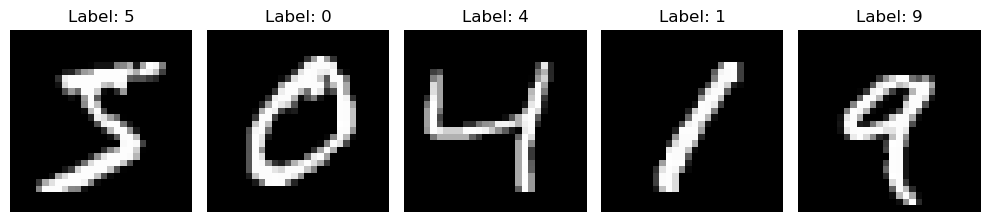

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Function to display images and their labels
def visualize_mnist_images(images, labels, num_images=5):
    plt.figure(figsize=(10, 4))
    
    # Plotting a grid of images
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize the first 5 images from the training set
visualize_mnist_images(X_train, y_train, num_images=5)

In [6]:
import pandas as pd

df_data = pd.read_excel('Run Times.xlsx')
df_data.describe()


FileNotFoundError: [Errno 2] No such file or directory: 'Run Times.xlsx'

In [10]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          5 non-null      object        
 1   Run Time      5 non-null      float64       
 2   Warm Up Time  5 non-null      object        
 3   Location      5 non-null      object        
 4   Run Date      5 non-null      datetime64[ns]
 5   Race Date     5 non-null      datetime64[ns]
 6   Rain          5 non-null      bool          
 7   Fee           5 non-null      object        
dtypes: bool(1), datetime64[ns](2), float64(1), object(4)
memory usage: 417.0+ bytes


In [11]:
df_data.duplicated

<bound method DataFrame.duplicated of      Name  Run Time Warm Up Time   Location            Run Date  Race Date  \
0  Alexis    9.2343          3.5   “school” 2023-04-15 12:00:00 2023-06-01   
1  Alexis   10.3842          3.5     School 2023-04-22 12:30:00 2023-06-01   
2  Alexis    8.1209        3 min  “the gym” 2023-05-10 15:00:00 2023-06-01   
3   David    7.2123          2.2   “school” 2023-05-01 15:15:00 2023-06-15   
4   David    6.8342            2      “gym” 2023-05-10 16:30:00 2023-06-15   

    Rain    Fee  
0  False  $0.00  
1   True  $0.00  
2  False  $2.50  
3  False  $0.00  
4  False  $2.50  >

In [12]:
cleaned = df_data.drop_duplicates(keep='last')
print(cleaned)

     Name  Run Time Warm Up Time   Location            Run Date  Race Date  \
0  Alexis    9.2343          3.5   “school” 2023-04-15 12:00:00 2023-06-01   
1  Alexis   10.3842          3.5     School 2023-04-22 12:30:00 2023-06-01   
2  Alexis    8.1209        3 min  “the gym” 2023-05-10 15:00:00 2023-06-01   
3   David    7.2123          2.2   “school” 2023-05-01 15:15:00 2023-06-15   
4   David    6.8342            2      “gym” 2023-05-10 16:30:00 2023-06-15   

    Rain    Fee  
0  False  $0.00  
1   True  $0.00  
2  False  $2.50  
3  False  $0.00  
4  False  $2.50  


In [16]:
cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          5 non-null      object        
 1   Run Time      5 non-null      float64       
 2   Warm Up Time  5 non-null      object        
 3   Location      5 non-null      object        
 4   Run Date      5 non-null      datetime64[ns]
 5   Race Date     5 non-null      datetime64[ns]
 6   Rain          5 non-null      bool          
 7   Fee           5 non-null      object        
dtypes: bool(1), datetime64[ns](2), float64(1), object(4)
memory usage: 417.0+ bytes


In [5]:
import requests
from bs4 import BeautifulSoup
import csv

# Base URL of the page to scrape
base_url = 'https://www.dtims.intan.my/search_course?page='

# Number of pages to scrape
num_pages = 10  # Adjust this number based on the total pages you want to scrape

# List to store course data
course_data = []

# Loop through each page
for page in range(1, num_pages + 1):
    # Construct the full URL for the current page
    url = base_url + str(page)
    
    # Send a request to the website
    response = requests.get(url)
    
    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find all course items (assuming each course item has a common parent class or identifier)
    course_items = soup.find_all('div', class_='mc-item mc-item-2')  # Adjust this selector to match the actual structure

    # Extract data for each course item
    for item in course_items:
        # Extracting course URL
        link_tag = item.find('a', href=True)
        if link_tag and 'detail_course' in link_tag['href']:
            course_url = link_tag['href']
            course_code = course_url.split('/')[-1]  # Extract course code from URL

            # Sending a request to the course detail page
            course_response = requests.get(course_url)
            course_soup = BeautifulSoup(course_response.text, 'html.parser')

            # Extracting "Kod Kursus" and "Nama Kursus" from the detail page
            sub_banner = course_soup.find('section', class_='sub-banner-course')
            if sub_banner:
                nama_kursus = sub_banner.find('h2').text.strip()
                kod_kursus = nama_kursus.split(']')[0].strip('[').strip()  # Extract "Kod Kursus" from text

            # Extracting course image
            image_tag = course_soup.find('div', class_='video-course-intro').find('img')
            course_image_url = image_tag['src'] if image_tag else 'N/A'  # Extract image URL if available

            # Append the extracted data to the list
            course_data.append({
                'course_code': course_code,
                'course_url': course_url,
                'kod_kursus': kod_kursus if sub_banner else 'N/A',
                'nama_kursus': nama_kursus if sub_banner else 'N/A',
                'course_image_url': course_image_url  # Add image URL
            })

# Saving the data into a CSV file
csv_filename = 'detailed_course_links_with_images.csv'
with open(csv_filename, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=['course_code', 'course_url', 'kod_kursus', 'nama_kursus', 'course_image_url'])
    writer.writeheader()
    for course in course_data:
        writer.writerow(course)

print(f"Data saved to {csv_filename}")


Data saved to detailed_course_links_with_images.csv


In [9]:
import pandas as pd

df_image = pd.read_csv('detailed_course_links_with_images.csv')
df_noimage = pd.read_csv('Updated_Courses_with_URLs.csv')

df_image.head()
# df_noimage.head()


,course_code,course_url,kod_kursus,nama_kursus,course_image_url
0,Xhqa6jQ44CSyTMWT,https://www.dtims.intan.my/detail_course/Xhqa6...,IEA0004,[ IEA0004 ] KURSUS PENGENDALIAN KREN KAMERA PR...,https://admin.dtims.intan.my/upload/banner/bn-...
1,odSCLQjFM5JzGu5w,https://www.dtims.intan.my/detail_course/odSCL...,BZA0074,[ BZA0074 ] Kursus Suntingan Video [ Siri 1/20...,https://admin.dtims.intan.my/upload/banner/bn-...
2,EYrQa6ano2nHaAh1,https://www.dtims.intan.my/detail_course/EYrQa...,UZA0071,[ UZA0071 ] Creative Content Creator [ Siri 1/...,https://admin.dtims.intan.my/upload/banner/bn-...
3,QlmPrwkeN3XccSfu,https://www.dtims.intan.my/detail_course/QlmPr...,BZA0073,[ BZA0073 ] Kursus Rekabentuk Grafik dan Penyu...,https://admin.dtims.intan.my/upload/banner/bn-...
4,NK0r2N0b7V7wkepI,https://www.dtims.intan.my/detail_course/NK0r2...,FZA0010,[ FZA0010 ] Kursus Asas Keusahawanan [ Siri 1/...,https://admin.dtims.intan.my/upload/banner/bn-...


In [10]:
import pandas as pd

# Load the CSV files into dataframes
df_image = pd.read_csv('detailed_course_links_with_images.csv')
df_noimage = pd.read_csv('Updated_Courses_with_URLs.csv')

# Merge the two dataframes on the 'course_url' column
df_updated = df_noimage.merge(df_image[['course_url', 'course_image_url']], on='course_url', how='left')

# Update the 'course_image_url' in df_noimage with the values from df_image
df_noimage['course_image_url'] = df_updated['course_image_url']

# Save the updated dataframe back to CSV
df_noimage.to_csv('Updated_Courses_with_Image_URLs.csv', index=False)

print("Updated CSV file saved as 'Updated_Courses_with_Image_URLs.csv'")


Updated CSV file saved as 'Updated_Courses_with_Image_URLs.csv'


In [4]:
# import requests
# from bs4 import BeautifulSoup
# import csv

# # Base URL of the page to scrape
# base_url = 'https://www.dtims.intan.my/search_course?page='

# # Number of pages to scrape
# num_pages = 10  # Adjust this number based on the total pages you want to scrape

# # List to store course data
# course_data = []

# # Loop through each page
# for page in range(1, num_pages + 1):
#     # Construct the full URL for the current page
#     url = base_url + str(page)
    
#     # Send a request to the website
#     response = requests.get(url)
    
#     # Parse the HTML content
#     soup = BeautifulSoup(response.text, 'html.parser')
    
#     # Find all course items (assuming each course item has a common parent class or identifier)
#     course_items = soup.find_all('div', class_='mc-item mc-item-2')  # Adjust this selector to match the actual structure

#     # Extract data for each course item
#     for item in course_items:
#         # Extracting course URL
#         link_tag = item.find('a', href=True)
#         if link_tag and 'detail_course' in link_tag['href']:
#             course_url = link_tag['href']
#             course_code = course_url.split('/')[-1]  # Extract course code from URL

#             # Sending a request to the course detail page
#             course_response = requests.get(course_url)
#             course_soup = BeautifulSoup(course_response.text, 'html.parser')

#             # Extracting "Kod Kursus" and "Nama Kursus" from the detail page
#             sub_banner = course_soup.find('section', class_='sub-banner-course')
#             if sub_banner:
#                 nama_kursus = sub_banner.find('h2').text.strip()
#                 kod_kursus = nama_kursus.split(']')[0].strip('[').strip()  # Extract "Kod Kursus" from text

#             # Extracting "Sinopsis Kursus"
#             sinopsis_section = course_soup.find('div', class_='card-header', string=' Sinopsis Kursus')
#             sinopsis_kursus = ''
#             if sinopsis_section:
#                 sinopsis_kursus = sinopsis_section.find_next('div', class_='card-body').get_text(separator=' ', strip=True)

#             # Extracting "Objektif Kursus"
#             objektif_section = course_soup.find('div', class_='card-header', string=' Objektif Kursus')
#             objektif_kursus = ''
#             if objektif_section:
#                 objektif_kursus = objektif_section.find_next('div', class_='card-body').get_text(separator=' ', strip=True)

#             # Append the extracted data to the list
#             course_data.append({
#                 'course_code': course_code,
#                 'course_url': course_url,
#                 'kod_kursus': kod_kursus if sub_banner else 'N/A',
#                 'nama_kursus': nama_kursus if sub_banner else 'N/A',
#                 'sinopsis_kursus': sinopsis_kursus,
#                 'objektif_kursus': objektif_kursus
#             })

# # Saving the data into a CSV file
# csv_filename = 'detailed_course_info.csv'
# with open(csv_filename, mode='w', newline='', encoding='utf-8') as file:
#     writer = csv.DictWriter(file, fieldnames=['course_code', 'course_url', 'kod_kursus', 'nama_kursus', 'sinopsis_kursus', 'objektif_kursus'])
#     writer.writeheader()
#     for course in course_data:
#         writer.writerow(course)

# print(f"Data saved to {csv_filename}")


Data saved to detailed_course_info.csv


In [8]:
### modify the course title to make it more organic and save it into updated_courses.csv

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import random

# Load the dataset from a CSV file
df = pd.read_csv("courses.csv")

# List of action words to choose from
action_words = ["Mastering", "Learn", "A Guide to", "Understanding", "Explore", "Advanced Techniques in"]

# Function to extract top N keywords using TF-IDF
def extract_keywords_advanced(text, top_n=3):
    if isinstance(text, str):
        # Using TF-IDF to extract top keywords
        tfidf = TfidfVectorizer(stop_words='english', max_features=50)
        tfidf_matrix = tfidf.fit_transform([text])  # Should pass a list of strings for TF-IDF
        terms = tfidf.get_feature_names_out()
        return sorted(terms[:top_n])
    return []

# Function to generate the new course title based on analysis
def generate_advanced_course_title(row):
    # Handle missing data with empty strings
    description = row.get('description', '')
    skills = row.get('skills_required', '')
    sub_skills = row.get('sub_skills_required', '')
    job_role = row.get('job_role', '')

    # Extract keywords from each relevant field
    description_keywords = extract_keywords_advanced(description)
    skill_keywords = extract_keywords_advanced(skills)
    sub_skill_keywords = extract_keywords_advanced(sub_skills)
    job_role_keywords = extract_keywords_advanced(job_role)

    # Select primary keywords for the title
    primary_skill = skill_keywords[0] if skill_keywords else ""
    specific_focus = sub_skill_keywords[0] if sub_skill_keywords else ""
    job_role_keyword = job_role_keywords[0] if job_role_keywords else ""

    # Randomly choose an action word
    action_word = random.choice(action_words)

    # Create a more structured and informative title
    new_title = f"{action_word} {primary_skill} for {job_role_keyword}: {specific_focus}"
    
    # Clean up the title to make it more readable
    new_title = re.sub(r'\s+', ' ', new_title).strip()
    
    return new_title

# Apply the function to the dataframe
df['improved_course_title'] = df.apply(generate_advanced_course_title, axis=1)

# Display the updated dataset
print(df[['title', 'improved_course_title']].head())

# Optionally, save the result to a new CSV file
df.to_csv("updated_courses.csv", index=False)


                         title  \
0      UI/UX Designer Course 1   
1              Tester Course 2   
2  Frontend Developer Course 3   
3              DevOps Course 4   
4      UI/UX Designer Course 5   

                               improved_course_title  
0            Explore prototyping for designer: adobe  
1                   Explore bug for tester: bugzilla  
2                    Explore css for developer: sass  
3          A Guide to automation for devops: jenkins  
4  Advanced Techniques in design for designer: adobe  


In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import random

# Load the dataset from a CSV file
df = pd.read_csv("courses.csv")

# List of concise action words
action_words = ["Master", "Learn", "Explore", "Understand"]

# Dictionary of skill synonyms
synonym_dict = {
    "js": "JavaScript",
    "html5": "HTML",
    "css3": "CSS",
    "xd": "Adobe XD"
}

# Function to normalize and merge similar skills
def normalize_skills(skills_list):
    # Normalize by making everything lowercase and removing leading/trailing spaces
    skills_list = [skill.lower().strip() for skill in skills_list]
    
    # Replace synonyms using the synonym dictionary
    normalized_skills = []
    for skill in skills_list:
        skill = synonym_dict.get(skill, skill)  # Replace synonym if found
        if skill not in normalized_skills:  # Avoid duplicates
            normalized_skills.append(skill)
    
    # Capitalize first letter of each skill for better readability
    return [skill.title() for skill in normalized_skills]

# Function to extract top N keywords using TF-IDF
def extract_keywords_advanced(text, top_n=5):
    if isinstance(text, str):
        # Using TF-IDF to extract top keywords
        tfidf = TfidfVectorizer(stop_words='english', max_features=50)
        tfidf_matrix = tfidf.fit_transform([text])
        terms = tfidf.get_feature_names_out()
        return sorted(terms[:top_n])
    return []

# Function to generate the course title based on all skills and sub-skills, merged
def generate_concise_course_title(row):
    # Handle missing data with empty strings
    description = row.get('description', '')
    skills = row.get('skills_required', '')
    sub_skills = row.get('sub_skills_required', '')
    job_role = row.get('job_role', '')

    # Extract keywords from each relevant field
    skill_keywords = extract_keywords_advanced(skills)
    sub_skill_keywords = extract_keywords_advanced(sub_skills)

    # Merge and normalize all skills and sub-skills
    all_skills = skill_keywords + sub_skill_keywords
    merged_skills = normalize_skills(all_skills)
    
    # Randomly choose an action word
    action_word = random.choice(action_words)

    # Create a concise title using merged skills
    if merged_skills:
        skills_str = ', '.join(merged_skills)
        new_title = f"{action_word} {job_role}: {skills_str}"
    else:
        new_title = f"{action_word} {job_role}"
    
    # Clean up the title to make it more readable
    new_title = re.sub(r'\s+', ' ', new_title).strip()
    
    return new_title

# Apply the function to the dataframe
df['concise_course_title'] = df.apply(generate_concise_course_title, axis=1)

# Display the updated dataset
print(df[['title', 'concise_course_title']].head())

# Optionally, save the result to a new CSV file
df.to_csv("concise_merged_courses.csv", index=False)


                         title  \
0      UI/UX Designer Course 1   
1              Tester Course 2   
2  Frontend Developer Course 3   
3              DevOps Course 4   
4      UI/UX Designer Course 5   

                                concise_course_title  
0  Master UI/UX Designer: Prototyping, Wireframin...  
1  Understand Tester: Bug, Techniques, Testing, T...  
2  Understand Frontend Developer: Css, Javascript...  
3  Understand DevOps: Automation, Continuous, Dep...  
4  Master UI/UX Designer: Design, Thinking, Adobe...  


In [1]:
# file : merge_subdomain.py
# 
# import pandas as pd

# # Load the courses and subdomain data
# courses_df = pd.read_csv('courses_1.csv', encoding='latin1')
# subdomain_df = pd.read_csv('subdomain_df.csv', encoding='latin1')

# # Merge the data to insert subdomain names
# merged_courses_df = courses_df.merge(subdomain_df[['subdomain_id', 'subdomain_name']], on='subdomain_id', how='left')

# # Save the updated DataFrame with subdomain names inserted
# merged_courses_df.to_csv('Updated_Courses_with_Subdomain.csv', index=False)

# # Print the first few rows to verify the merge
# print(merged_courses_df.head())


  course_id                                            title  job_role  \
0   KCA0038          Fundamentals of Enterprise Architecture       NaN   
1   KCA0044  DEVELOPMENT OF STRATEGIC PLAN DEVELOPMENT (PSP)       NaN   
2   KCA0054                                  Cloud Computing       NaN   
3   KCA0051                 IT Change Management Foundations       NaN   
4   KCA0083               Refresher DGCCR Certified Trainers       NaN   

   skills_required  sub_skills_required  \
0              NaN                  NaN   
1              NaN                  NaN   
2              NaN                  NaN   
3              NaN                  NaN   
4              NaN                  NaN   

                                         description  subdomain_id  \
0  Dive into the world of enterprise architecture...             1   
1  Master the art of strategic planning with a fo...             1   
2  Explore the essentials of cloud computing, inc...             1   
3  This course o

In [11]:
import pandas as pd
import random

# Load the dataset from a CSV file
df = pd.read_csv("courses.csv")

# Expanded list of description templates
description_templates = [
    "As a {job_role}, mastering {skills} is crucial. This course provides hands-on training with tools like {sub_skills} to create user-centric designs.",
    "The {job_role} role requires a strong foundation in {skills}. In this course, you will learn to leverage tools like {sub_skills} for efficient design.",
    "Learn the essentials of {job_role}, focusing on {skills}. You'll dive into industry-standard tools like {sub_skills} to build professional-level projects.",
    "Gain the skills needed to excel as a {job_role}, including {skills}. This course includes practical exercises with tools like {sub_skills}.",
    "Explore the key skills of {job_role}, such as {skills}. You’ll also work with powerful tools like {sub_skills} to enhance your design abilities.",
    "In the role of a {job_role}, you will need expertise in {skills}. This course will guide you through practical applications of tools like {sub_skills}, helping you build real-world projects.",
    "A successful {job_role} relies heavily on {skills}. With this course, you'll not only learn the theory but also gain hands-on experience with tools such as {sub_skills} to bring your ideas to life.",
    "This course offers comprehensive training for aspiring {job_role}s, focusing on key skills such as {skills}. You’ll also get the chance to work with industry-standard tools like {sub_skills}.",
    "Designed for {job_role}s, this course covers core skills like {skills}, and teaches you how to apply them using essential tools like {sub_skills}. It's an ideal step toward mastering your craft.",
    "Step into the role of a {job_role} with confidence, learning critical skills such as {skills}. This course will provide you with hands-on experience using {sub_skills}, the tools you need to succeed.",
    # Add more templates as needed from the list above...
]

# Function to modify the course description
def modify_description(row):
    # Extract information from the row
    job_role = row['job_role']
    skills = row['skills_required']
    sub_skills = row['sub_skills_required']
    
    # Randomly choose a description template
    template = random.choice(description_templates)
    
    # Fill the template with values
    new_description = template.format(
        job_role=job_role,
        skills=skills,
        sub_skills=sub_skills
    )
    
    return new_description

# Apply the function to the dataframe to modify descriptions
df['modified_description'] = df.apply(modify_description, axis=1)

# Display the updated dataset with new descriptions
print(df[['description', 'modified_description']].head())

# Optionally, save the result to a new CSV file
df.to_csv("modified_course_descriptions.csv", index=False)


                                         description  \
0  This course covers essential skills for the ro...   
1  This course covers essential skills for the ro...   
2  This course covers essential skills for the ro...   
3  This course covers essential skills for the ro...   
4  This course covers essential skills for the ro...   

                                modified_description  
0  A successful UI/UX Designer relies heavily on ...  
1  This course offers comprehensive training for ...  
2  This course offers comprehensive training for ...  
3  Learn the essentials of DevOps, focusing on Au...  
4  A successful UI/UX Designer relies heavily on ...  


In [13]:
import pandas as pd
import numpy as np
import random

# Expanded list of job roles and their required skills and sub-skills
job_roles = [
    'Data Scientist', 'Data Analyst', 'Data Engineer', 'Web Developer',
    'Backend Developer', 'Frontend Developer', 'Business Analyst',
    'Scrum Master', 'Software Engineer', 'UI/UX Designer', 'Admin',
    'DevOps Engineer', 'Project Manager', 'Tester', 'Cloud Architect',
    'AI Engineer', 'Blockchain Developer', 'Cybersecurity Analyst',
    'Mobile Developer', 'Machine Learning Engineer', 'Database Administrator',
    'Network Engineer', 'Security Engineer', 'Site Reliability Engineer',
    'IT Support Specialist', 'Cloud Security Engineer', 'IoT Developer',
    'Data Architect', 'Product Manager', 'IT Manager', 'Solutions Architect',
    'Penetration Tester', 'Software Architect', 'Ethical Hacker', 
    'Systems Analyst', 'Quality Assurance Engineer', 'Technical Writer'
]

# Skills dictionary
skills_dict = {
    'Data Scientist': {
        'main': ['Python', 'Statistics', 'Machine Learning'],
        'sub': ['Pandas', 'Scikit-learn', 'TensorFlow', 'Keras']
    },
    'Data Analyst': {
        'main': ['Excel', 'SQL', 'Data Visualization'],
        'sub': ['Tableau', 'Power BI', 'Matplotlib', 'Seaborn']
    },
    'Data Engineer': {
        'main': ['ETL', 'Big Data', 'SQL'],
        'sub': ['Apache Spark', 'Hadoop', 'Kafka', 'Airflow']
    },
    'Web Developer': {
        'main': ['HTML', 'CSS', 'JavaScript'],
        'sub': ['React', 'Angular', 'Vue.js', 'Bootstrap']
    },
    'Backend Developer': {
        'main': ['Node.js', 'API Development', 'Database Management'],
        'sub': ['Express.js', 'MongoDB', 'SQL Server', 'Django']
    },
    'Frontend Developer': {
        'main': ['HTML', 'CSS', 'JavaScript'],
        'sub': ['Sass', 'Webpack', 'JQuery', 'Vue.js']
    },
    'Business Analyst': {
        'main': ['Requirement Gathering', 'Data Analysis', 'Reporting'],
        'sub': ['JIRA', 'Confluence', 'SQL', 'Excel']
    },
    'Scrum Master': {
        'main': ['Agile Methodology', 'Scrum Practices'],
        'sub': ['JIRA', 'Confluence', 'Retrospectives', 'Stand-ups']
    },
    'Software Engineer': {
        'main': ['Programming', 'Software Design', 'Testing'],
        'sub': ['Git', 'JUnit', 'Docker', 'Kubernetes']
    },
    'UI/UX Designer': {
        'main': ['Design Thinking', 'Wireframing', 'Prototyping'],
        'sub': ['Sketch', 'Figma', 'Adobe XD', 'InVision']
    },
    'Admin': {
        'main': ['System Administration', 'Network Management'],
        'sub': ['Linux', 'Windows Server', 'Networking', 'Scripting']
    },
    'DevOps Engineer': {
        'main': ['Continuous Integration', 'Continuous Deployment', 'Automation'],
        'sub': ['Jenkins', 'Docker', 'Kubernetes', 'Ansible']
    },
    'Project Manager': {
        'main': ['Project Planning', 'Risk Management', 'Budgeting'],
        'sub': ['MS Project', 'Asana', 'Trello', 'Gantt Charts']
    },
    'Tester': {
        'main': ['Testing Techniques', 'Automation', 'Bug Tracking'],
        'sub': ['Selenium', 'JUnit', 'Bugzilla', 'TestRail']
    },
    'Cloud Architect': {
        'main': ['Cloud Computing', 'Infrastructure Design', 'Security'],
        'sub': ['AWS', 'Azure', 'Google Cloud', 'Terraform']
    },
    'AI Engineer': {
        'main': ['Artificial Intelligence', 'Deep Learning', 'Natural Language Processing'],
        'sub': ['TensorFlow', 'Keras', 'PyTorch', 'OpenCV']
    },
    'Blockchain Developer': {
        'main': ['Smart Contracts', 'Distributed Ledger Technology', 'Security'],
        'sub': ['Solidity', 'Ethereum', 'Hyperledger', 'Truffle']
    },
    'Cybersecurity Analyst': {
        'main': ['Security Assessment', 'Penetration Testing', 'Incident Response'],
        'sub': ['Nmap', 'Wireshark', 'Metasploit', 'Splunk']
    },
    'Mobile Developer': {
        'main': ['Mobile App Development', 'UI/UX Design', 'API Integration'],
        'sub': ['React Native', 'Flutter', 'Swift', 'Kotlin']
    },
    'Machine Learning Engineer': {
        'main': ['Machine Learning', 'Data Preprocessing', 'Model Optimization'],
        'sub': ['TensorFlow', 'PyTorch', 'Keras', 'Scikit-learn']
    },
    'Database Administrator': {
        'main': ['Database Management', 'SQL', 'Backup and Recovery'],
        'sub': ['MySQL', 'Oracle', 'SQL Server', 'PostgreSQL']
    },
    'Network Engineer': {
        'main': ['Networking', 'Routing and Switching', 'Security'],
        'sub': ['Cisco', 'Juniper', 'BGP', 'Firewall Management']
    },
    'Security Engineer': {
        'main': ['Network Security', 'Data Encryption', 'Incident Response'],
        'sub': ['SSL', 'TLS', 'PKI', 'Firewalls']
    },
    'Site Reliability Engineer': {
        'main': ['System Reliability', 'Infrastructure Automation', 'Monitoring'],
        'sub': ['Prometheus', 'Grafana', 'Kubernetes', 'Ansible']
    },
    'IT Support Specialist': {
        'main': ['Troubleshooting', 'Technical Support', 'Customer Service'],
        'sub': ['Helpdesk Tools', 'Windows', 'MacOS', 'Linux']
    },
    'Cloud Security Engineer': {
        'main': ['Cloud Security', 'Compliance', 'Risk Management'],
        'sub': ['IAM', 'AWS Security', 'Azure Security', 'SOC 2']
    },
    'IoT Developer': {
        'main': ['IoT Protocols', 'Embedded Systems', 'Device Integration'],
        'sub': ['MQTT', 'Zigbee', 'LoRaWAN', 'Arduino']
    },
    'Data Architect': {
        'main': ['Data Modeling', 'Database Design', 'ETL'],
        'sub': ['SQL', 'Hadoop', 'Data Lakes', 'Amazon Redshift']
    },
    'Product Manager': {
        'main': ['Product Roadmap', 'Agile Methodologies', 'Market Analysis'],
        'sub': ['JIRA', 'Confluence', 'Trello', 'User Stories']
    },
    'IT Manager': {
        'main': ['IT Strategy', 'Team Leadership', 'Budgeting'],
        'sub': ['ITIL', 'Change Management', 'Disaster Recovery', 'SLAs']
    },
    'Solutions Architect': {
        'main': ['Solution Design', 'Technical Leadership', 'Integration'],
        'sub': ['AWS', 'Azure', 'GCP', 'API Design']
    },
    'Penetration Tester': {
        'main': ['Penetration Testing', 'Vulnerability Assessment', 'Security Analysis'],
        'sub': ['Metasploit', 'Burp Suite', 'Kali Linux', 'OWASP ZAP']
    },
    'Software Architect': {
        'main': ['Software Design', 'System Architecture', 'Scalability'],
        'sub': ['UML', 'Microservices', 'Cloud Architecture', 'Docker']
    },
    'Ethical Hacker': {
        'main': ['Hacking Techniques', 'Penetration Testing', 'Network Security'],
        'sub': ['Kali Linux', 'Nmap', 'Wireshark', 'Burp Suite']
    },
    'Systems Analyst': {
        'main': ['System Analysis', 'Requirements Gathering', 'Solution Design'],
        'sub': ['UML', 'BPMN', 'JIRA', 'Confluence']
    },
    'Quality Assurance Engineer': {
        'main': ['Testing', 'Automation', 'Quality Assurance'],
        'sub': ['Selenium', 'Cypress', 'JIRA', 'Postman']
    },
    'Technical Writer': {
        'main': ['Documentation', 'Technical Writing', 'User Manuals'],
        'sub': ['Markdown', 'Confluence', 'API Documentation', 'GitHub']
    }
}

# List of difficulty levels
difficulty_levels = ['Beginner', 'Intermediate', 'Advanced']

# List of title variations
title_variations = [
    'Mastering {job_role}', 'Introduction to {job_role}', '{job_role} Essentials',
    '{job_role}: Advanced Techniques', 'Complete {job_role} Course', 'Foundations of {job_role}'
]

# List of description templates for variety
description_templates = [
    "As a {job_role}, mastering {skills_required} is essential. You'll also gain hands-on experience with tools like {sub_skills_required}.",
    "In this {job_role} course, you'll learn {skills_required} and work with tools like {sub_skills_required}.",
    "This course equips you with the key skills of a {job_role}, focusing on {skills_required} and tools like {sub_skills_required}.",
    "Gain expertise as a {job_role} by mastering {skills_required} and working with {sub_skills_required}.",
    "This {job_role} course helps you develop proficiency in {skills_required}, along with experience using {sub_skills_required}.",
    "Develop critical skills such as {skills_required} and gain practical knowledge with {sub_skills_required} in this {job_role} course."
]

# Function to generate course duration based on difficulty level
def generate_course_duration(difficulty):
    if difficulty == 'Beginner':
        return np.random.randint(5, 21)  # Duration between 5 and 20 hours
    elif difficulty == 'Intermediate':
        return np.random.randint(20, 41)  # Duration between 20 and 40 hours
    else:  # Advanced
        return np.random.randint(40, 61)  # Duration between 40 and 60 hours

# Function to generate courses for a specific job role
def generate_courses_data(num_courses):
    courses = []
    course_id = 1
    for _ in range(num_courses):
        job_role = np.random.choice(job_roles)  # Randomly select a job role for multiple courses
        main_skills = skills_dict[job_role]['main']
        sub_skills = skills_dict[job_role]['sub']
        difficulty = np.random.choice(difficulty_levels)  # Randomly select difficulty level
        duration = generate_course_duration(difficulty)  # Generate course duration based on difficulty level
        
        # Generate multiple courses for the same job role with varying skills and sub-skills
        for i in range(np.random.randint(1, 4)):  # Generate between 1 to 3 courses per job role
            skills_required = ', '.join(np.random.choice(main_skills, size=np.random.randint(1, 3), replace=False))
            sub_skills_required = ', '.join(np.random.choice(sub_skills, size=np.random.randint(1, 3), replace=False))
            
            # Randomly select a course title template and format it
            course_title_template = random.choice(title_variations)
            course_title = course_title_template.format(job_role=job_role)
            
            # Randomly select a course description template and format it
            course_description_template = random.choice(description_templates)
            course_description = course_description_template.format(
                job_role=job_role,
                skills_required=skills_required,
                sub_skills_required=sub_skills_required
            )
            
            courses.append({
                'course_id': course_id,
                'title': course_title,
                'job_role': job_role,
                'skills_required': skills_required,
                'sub_skills_required': sub_skills_required,
                'difficulty': difficulty,  # Add difficulty level to each course
                'duration_hours': duration,  # Add course duration (in hours)
                'description': course_description
            })
            course_id += 1
    return pd.DataFrame(courses).drop_duplicates(subset=['job_role', 'skills_required', 'sub_skills_required'])

# Generate the synthetic course data
def generate_synthetic_data():
    num_courses = 50  # Total number of courses
    courses_df = generate_courses_data(num_courses)
    
    # Save to CSV file
    courses_df.to_csv('courses_more_with_duration.csv', index=False) 

# Run data generation
generate_synthetic_data()


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Send a request to the specific page
url = 'https://www.netacad.com/catalogs/learn/networking?category=course'
response = requests.get(url)

# Step 2: Parse the page content
soup = BeautifulSoup(response.content, 'html.parser')

# Step 3: Find all courses (You may need to inspect the HTML structure of the webpage)
courses = soup.find_all('div', class_='course-card')

# Step 4: Extract details for each course
course_data = []
for course in courses:
    title = course.find('h3', class_='course-card-title').text.strip()
    course_url = 'https://www.netacad.com' + course.find('a')['href']
    image_url = course.find('img')['src']
    overview = course.find('p', class_='course-card-description').text.strip()
    
    course_data.append({
        'Course Title': title,
        'URL': course_url,
        'Image URL': image_url,
        'Overview': overview
    })

# Step 5: Convert to DataFrame and save to CSV
df = pd.DataFrame(course_data)
df.to_csv('netacad_networking_courses.csv', index=False)

print("Networking courses scraped and saved to 'netacad_networking_courses.csv'")


Networking courses scraped and saved to 'netacad_networking_courses.csv'
